In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
reader = cv2.VideoCapture('examples/img_%05d.jpg')
ret, image = reader.read()

In [2]:
image = cv2.imread("gt.png")

In [3]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

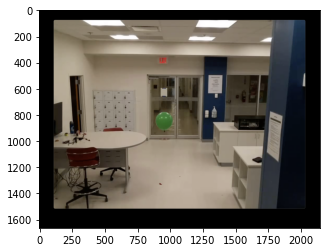

In [4]:
plt.imshow(rgb)

# Red

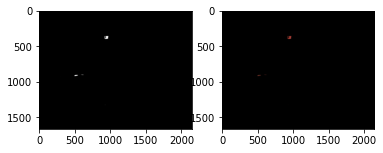

In [5]:
thresh1 = cv2.bitwise_or(cv2.inRange(hsv, (0, 150, 100), (20, 255, 255)),
                         cv2.inRange(hsv, (160, 150, 100), (180, 255, 255)))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(thresh1, cmap='gray')
ax2.imshow(cv2.bitwise_and(rgb,rgb,mask=thresh1))

# Green

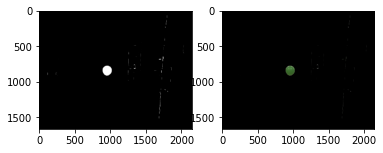

In [11]:
thresh4 = cv2.inRange(hsv, (40, 0, 0), (60, 255, 255))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(thresh4, cmap='gray')
ax2.imshow(cv2.bitwise_and(rgb,rgb,mask=thresh4))

# Blue

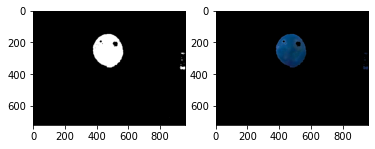

In [17]:
thresh2 = cv2.inRange(hsv, (105-10, 150, 0), (105+10, 255, 255))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(thresh2, cmap='gray')
ax2.imshow(cv2.bitwise_and(rgb,rgb,mask=thresh2))

# Yellow

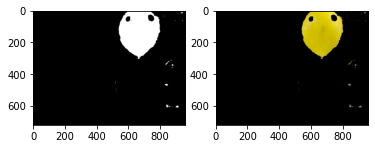

In [18]:
thresh3 = cv2.inRange(hsv, (25-10, 150, 150), (25+10, 255, 255))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(thresh3, cmap='gray')
ax2.imshow(cv2.bitwise_and(rgb,rgb,mask=thresh3))

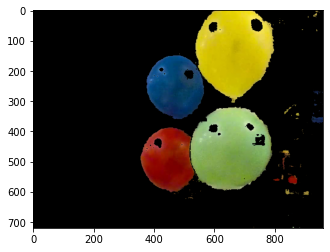

In [19]:
plt.imshow(
cv2.bitwise_or(cv2.bitwise_or(cv2.bitwise_and(rgb,rgb,mask=thresh1),
                              cv2.bitwise_and(rgb,rgb,mask=thresh2)),
               cv2.bitwise_or(cv2.bitwise_and(rgb,rgb,mask=thresh3),
                              cv2.bitwise_and(rgb,rgb,mask=thresh4))))

In [9]:
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
areas = [cv2.contourArea(contour) for contour in contours]

In [15]:
filtered = [c for c in contours if cv2.contourArea(c) > 1000]

In [18]:
contour = max(filtered, key=lambda c: cv2.contourArea(c))

In [27]:
mu = cv2.moments(contour)
center = (int(mu['m10'] / mu['m00']) - image.shape[1]//2, -int(mu['m01'] / mu['m00']) + image.shape[0]//2)

In [28]:
center

(-34, -133)

In [30]:
image.shape

(720, 960, 3)

In [33]:
-480 / image.shape[1] * 82.6

-41.3

Setting Lower and Upper Range for HSV


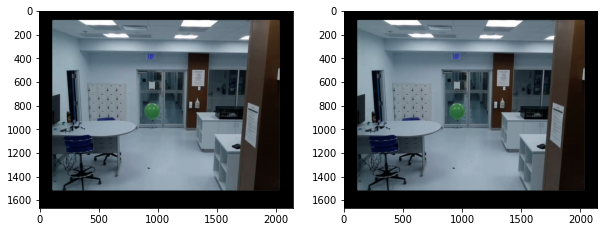

interactive(children=(IntSlider(value=105, description='lower_H', max=255, min=1), IntSlider(value=130, descri…

<function __main__.f(lower_H, lower_S, lower_V, upper_H, upper_S, upper_V, **kwargs)>

In [8]:
from ipywidgets import interact, widgets
from IPython.display import display
import cv2
import matplotlib.pyplot as plt
import numpy as np

def f(lower_H, lower_S, lower_V, upper_H, upper_S, upper_V, **kwargs):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_range = np.array([lower_H, lower_S, lower_V])
    upper_range = np.array([upper_H, upper_S, upper_V])

    mask = cv2.inRange(hsv, lower_range, upper_range)

    ax_neu.imshow(mask, cmap="gray")
    ax_neu.set_title(f"Lower Range: H = {lower_H}, S = {lower_S}, V = {lower_V}\
                     \nUpper Range: H = {upper_H}, S = {upper_S}, V = {upper_V}")
    fig.canvas.draw()
    display(fig)

fig = plt.figure(figsize=(10, 8))
ax_orig = fig.add_subplot(121) 
ax_neu = fig.add_subplot(122) 

ax_orig.imshow(image, cmap="gray")
ax_neu.imshow(image, cmap="gray")

print("Setting Lower and Upper Range for HSV")
interact(f, lower_H=widgets.IntSlider(min=1,max=255,step=1,value=105),
            lower_S=widgets.IntSlider(min=1,max=255,step=1,value=130),
            lower_V=widgets.IntSlider(min=1,max=255,step=1,value=110),
            upper_H=widgets.IntSlider(min=1,max=255,step=1,value=225),
            upper_S=widgets.IntSlider(min=1,max=255,step=1,value=205),
            upper_V=widgets.IntSlider(min=1,max=255,step=1,value=255))